# Gradient Descent Update Rule

Given the mean squared error as our loss function: 

$$MSE = \frac{1}{n} \sum_{i = 1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$$

We can find the update rule for a single iteration of gradient descent by finding the partial derivative with respect to both $\beta_0$ and $\beta_1$

$$
\begin{align}
\frac{\partial MSE}{\partial \beta_0} & = \frac{1}{n} \sum_{i = 1}^n \frac{\partial}{\partial \beta_0} (y_i - (\beta_0 + \beta_1 x_i))^2\\
    & = - \frac{2}{n} \sum_{i = 1}^n (y_i - (\beta_0 + \beta_1 x_i))
\end{align}
$$

$$
\newline
$$

$$
\begin{align}
\frac{\partial MSE}{\partial \beta_1} & = \frac{1}{n} \sum_{i = 1}^n \frac{\partial}{\partial \beta_1} (y_i - (\beta_0 + \beta_1 x_i))^2\\
    & = - \frac{2}{n} \sum_{i = 1}^n x_i (y_i - (\beta_0 + \beta_1 x_i))
\end{align}
$$

Then, our update rule for gradient descent is as follows:

$$\beta_0 \leftarrow \beta_0 - \lambda \bigg[ - \frac{2}{n} \sum_{i = 1}^n (y_i - (\beta_0 + \beta_1 x_i)) \bigg]$$

$$\beta_1 \leftarrow \beta_1 - \lambda \bigg[ - \frac{2}{n} \sum_{i = 1}^n x_i (y_i - (\beta_0 + \beta_1 x_i)) \bigg]$$

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [106]:
def gradient_descent(X, y, lr=0.05, epochs=100):
    N = len(X)
    w0, w1 = np.random.rand(2, 1)

    for i in range(epochs):       
        f = y - (w0 + w1 * X)
        w0 -= lr * (-2 * f.sum() / N)
        w1 -= lr * (-2 * X.dot(f).sum() / N)

    return [w0, w1]

In [107]:
X = np.array([1, 2, 3, 5])
y = np.array([0, 2, 4, 5])

w = gradient_descent(X, y)
y_pred = w[0] + w[1] * X

Final weights:  [-0.52387214] [1.19839874]
Prediction:  [0.74716847 1.91615758 3.08514669 5.42312491]
MSE:  0.39532038527024205
R^2:  0.8927944717911208


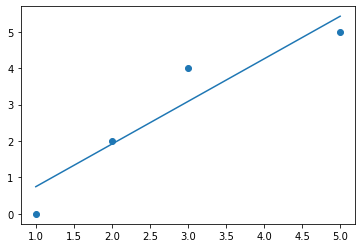

In [120]:
print('Final weights: ', w0, w1)
print('Prediction: ', y_pred)
print('MSE: ', mean_squared_error(y, y_pred))
print('R^2: ', r2_score(y, y_pred))

plt.plot(X, y_pred)
plt.scatter(X, y)

# Model Fit
We see that $R^2 = 0.893$, which means the variation in y can be explained relatively accurately by X.

From our model, $Y = \beta_0 + \beta_1 X$, we can interpret $\beta_0$ to be the y-intercept and $\beta_1$ to be the slope of the line.

In [121]:
x = np.linspace(0, 100, 500)
y = x + 2 * np.random.randn(len(x))